# National EDA
## Summary Stats for Final Report

In [108]:
options(warn=-1) # Warnings disabled
library(dplyr)
library(ggplot2)

###  Load Data

In [109]:
turnout <- read.csv('../20_intermediate_files/turnout_v3.csv', row.names=1)
head(turnout)

,State,Year,treatment,VEP_Counted_D,VEP,Democrat,Type,Pop,White,Black,Hispanic
,<fct>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,Iowa,2008,0,0.10743270,2196724,236000,Caucus,2894000,2609000,77500,118700
2,New Hampshire,2008,0,0.29196891,988708,288672,Primary,1275300,1185300,8000,37700
3,Michigan,2008,0,0.08137845,7304120,594398,Primary,9764400,7594800,1317400,396100
4,Nevada,2008,0,0.07042257,1669337,117559,Caucus,2556800,1447500,181000,664100
5,South Carolina,2008,0,0.16474432,3230163,532151,Primary,4318400,2819300,1205500,167900
6,Florida,2008,0,0.13940105,12553134,1749920,Primary,17874300,10772300,2598100,3771200


In [110]:
turnout <- turnout %>%
    mutate(WhitePerc = White/Pop,
           BlackPerc = Black/Pop,
           HispPerc = Hispanic/Pop)

In [111]:
# Create treatment & control data sets for 2020
control <- turnout %>%
    filter(treatment == FALSE, Year == 2020) 
treatment <- turnout %>%
    filter(treatment == TRUE, Year == 2020) 

# Set colors for viz
colors <- c('Control' = "blue", 'Treatment' = 'orange')

### Population

Population is relatively similar across both groups.

In [112]:
turnout %>%
    filter(Year == 2020) %>%
    group_by(treatment) %>%
    summarise(mean_pop = mean(Pop), median_pop = median(Pop))

treatment,mean_pop,median_pop
<int>,<dbl>,<dbl>
0,6753396,4910302
1,4921412,5529250


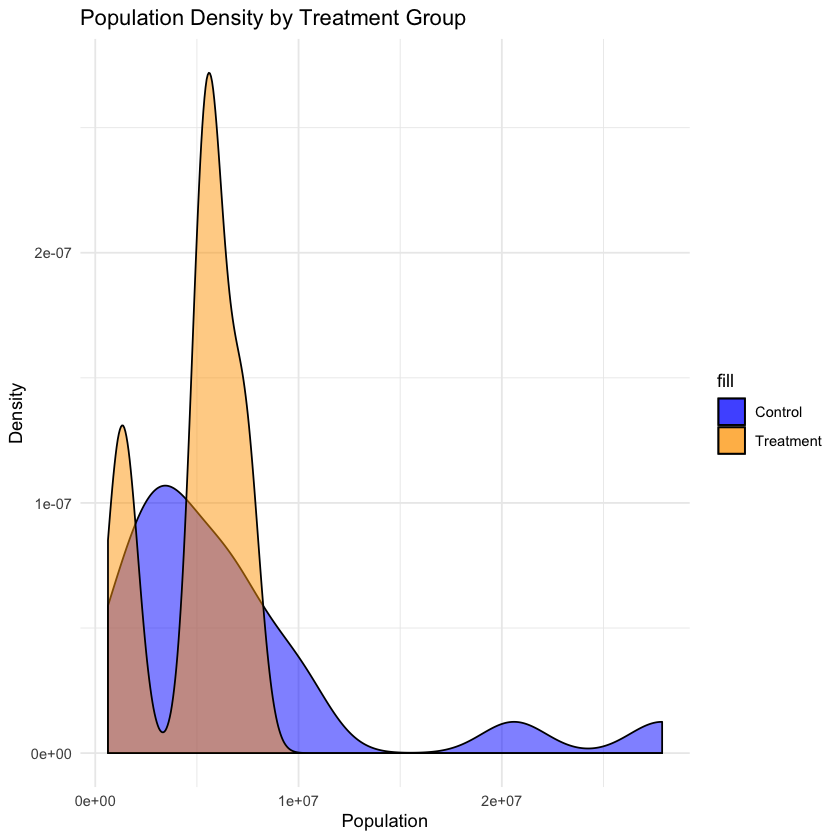

In [113]:
# Kernal Density
ggplot() + 
    geom_density(data=control, mapping=aes(Pop, fill='Control'), alpha=.5) + 
    geom_density(data=treatment, mapping=aes(Pop, fill='Treatment'), alpha=.5) + 
    labs(x='Population', y='Density', title='Population Density by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()

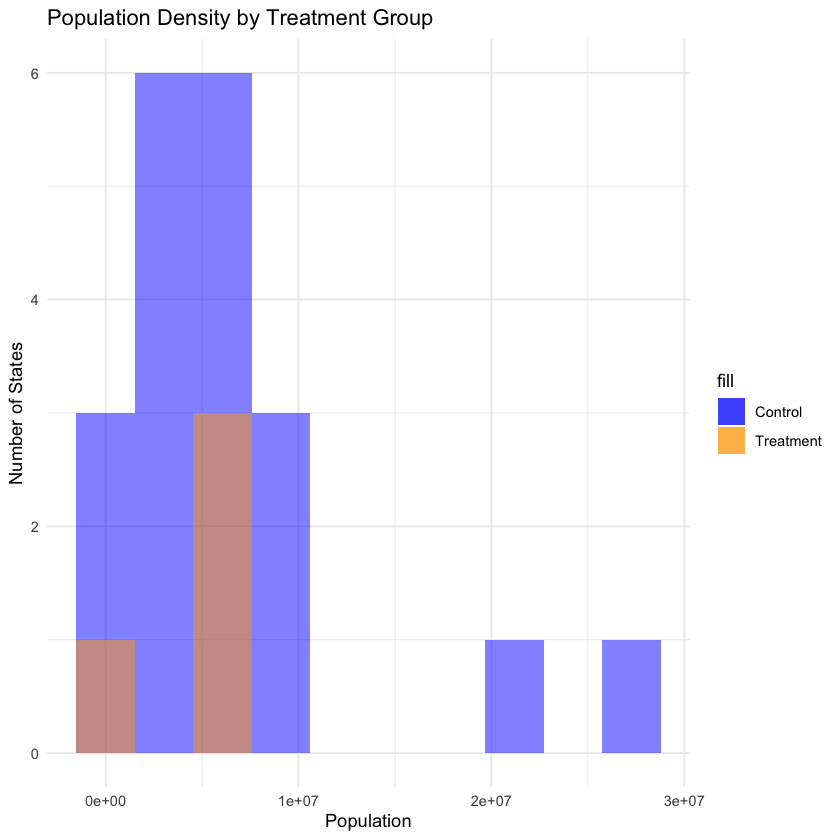

In [114]:
# Histogram
ggplot() + 
    geom_histogram(data=control, mapping=aes(Pop, fill='Control'), bins=10, alpha=.5) + 
    geom_histogram(data=treatment, mapping=aes(Pop, fill='Treatment'), bins=10, alpha=.5) + 
    labs(x='Population', y='Number of States', title='Population Density by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()

## White

Treatment group states lean more white than control groups on average.

In [115]:
turnout %>%
    filter(Year == 2020) %>%
    group_by(treatment) %>%
    summarise(mean_white = mean(WhitePerc), median_white = median(WhitePerc))

treatment,mean_white,median_white
<int>,<dbl>,<dbl>
0,0.7707833,0.7711032
1,0.8450296,0.8375108


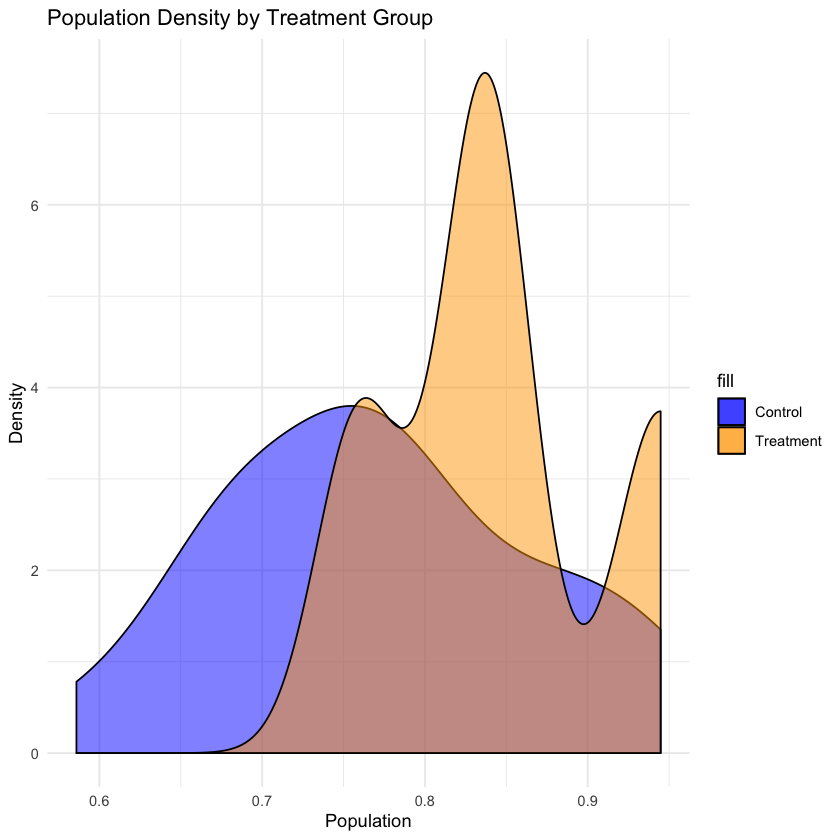

In [101]:
# Kernal Density
ggplot() + 
    geom_density(data=control, mapping=aes(WhitePerc, fill='Control'), alpha=.5) + 
    geom_density(data=treatment, mapping=aes(WhitePerc, fill='Treatment'), alpha=.5) + 
    labs(x='Population', y='Density', title='Population Density by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()

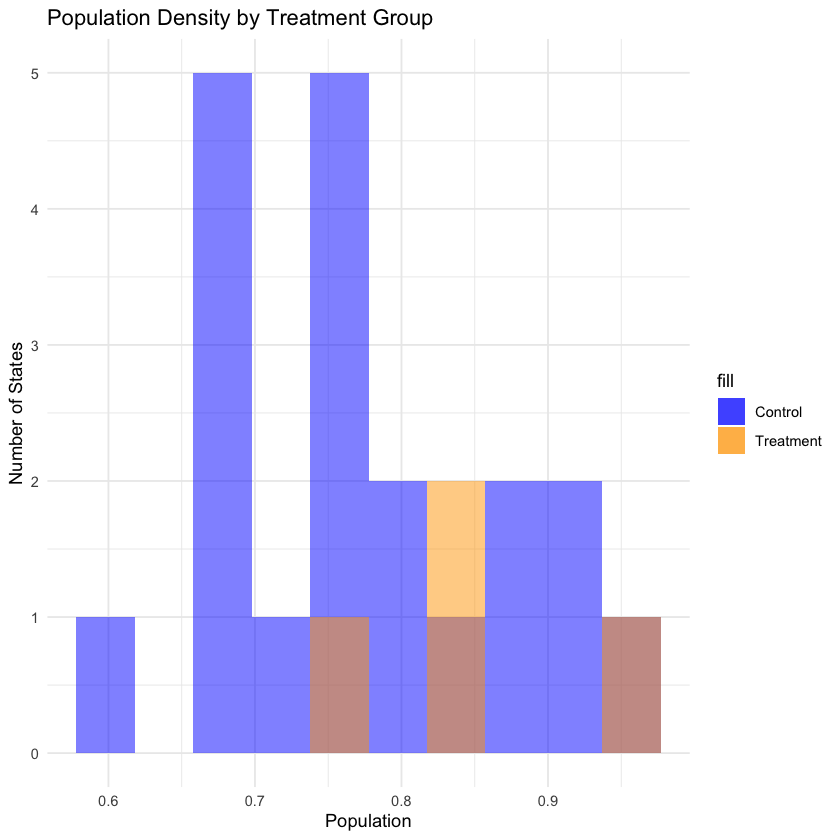

In [116]:
# Histogram
ggplot() + 
    geom_histogram(data=control, mapping=aes(WhitePerc, fill='Control'), bins=10, alpha=.5) + 
    geom_histogram(data=treatment, mapping=aes(WhitePerc, fill='Treatment'), bins=10, alpha=.5) + 
    labs(x='Population', y='Number of States', title='Population Density by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()